Reading Data - summer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
summer_athletes = pd.read_csv('Athletes_summer_games.csv', index_col=0)
# Time 0.4s

In [4]:
summer_athletes.head()

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [4]:
summer_athletes.info()
# Time 0.2s

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237673 entries, 0 to 15120
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    237673 non-null  object 
 1   Sex     237673 non-null  object 
 2   Age     228484 non-null  float64
 3   Team    237673 non-null  object 
 4   NOC     237673 non-null  object 
 5   Games   237673 non-null  object 
 6   Year    237673 non-null  int64  
 7   Season  237673 non-null  object 
 8   City    237673 non-null  object 
 9   Sport   237673 non-null  object 
 10  Event   237673 non-null  object 
 11  Medal   36537 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 23.6+ MB


In [5]:
print('summer_athletes shape:',summer_athletes.shape)

# Time 0.0s

summer_athletes shape: (237673, 12)


In [6]:
summer_athletes.describe()

# Time 0.0s

,Age,Year
count,228484.000000,237673.000000
mean,25.746267,1979.096246
std,6.638720,31.783967
min,10.000000,1896.000000
25%,21.000000,1960.000000
50%,25.000000,1988.000000
75%,29.000000,2004.000000
max,97.000000,2020.000000


United States         15382
Great Britain         10857
France                10559
Italy                  8575
Germany                7975
                      ...  
Diabolo St Maurice        1
Essen                     1
Breslau                   1
Hb-20                     1
Rambo                     1
Name: Team, Length: 1169, dtype: int64


<AxesSubplot:>

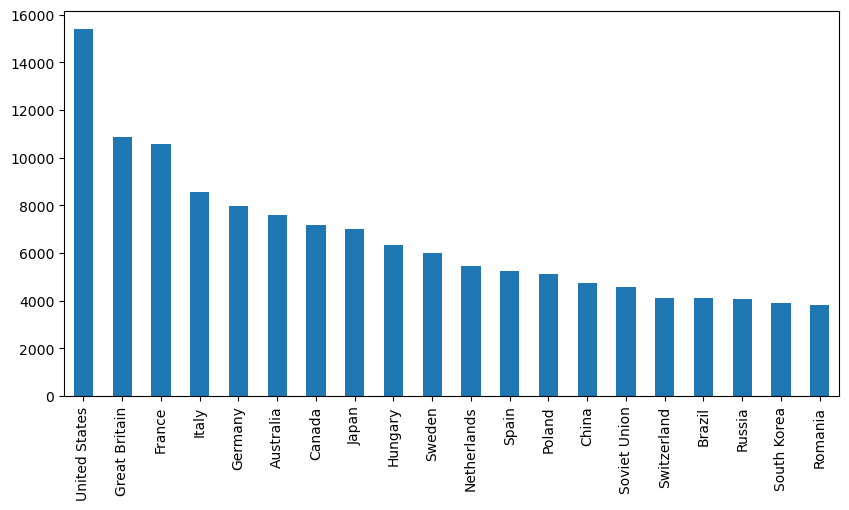

In [7]:
count_value_of_teams = summer_athletes['Team'].value_counts()
print(count_value_of_teams)
#To much number of Teams to plot everything so i plot first 20
count_value_of_teams.head(20).plot(kind='bar', figsize=(10,5))

# Time 0.2s

<AxesSubplot:>

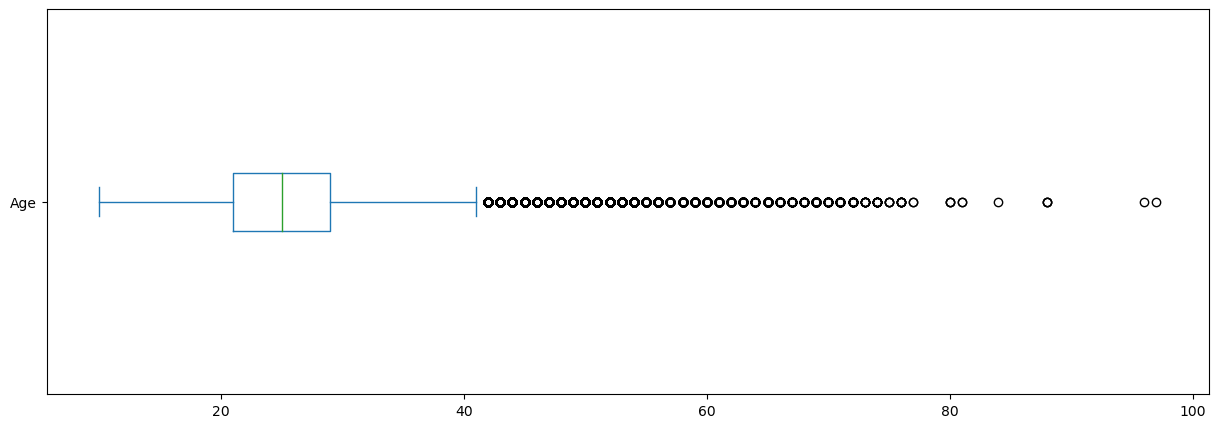

In [8]:
summer_athletes['Age'].plot(kind='box', vert=False, figsize=(15,5))

# Time 0.0s

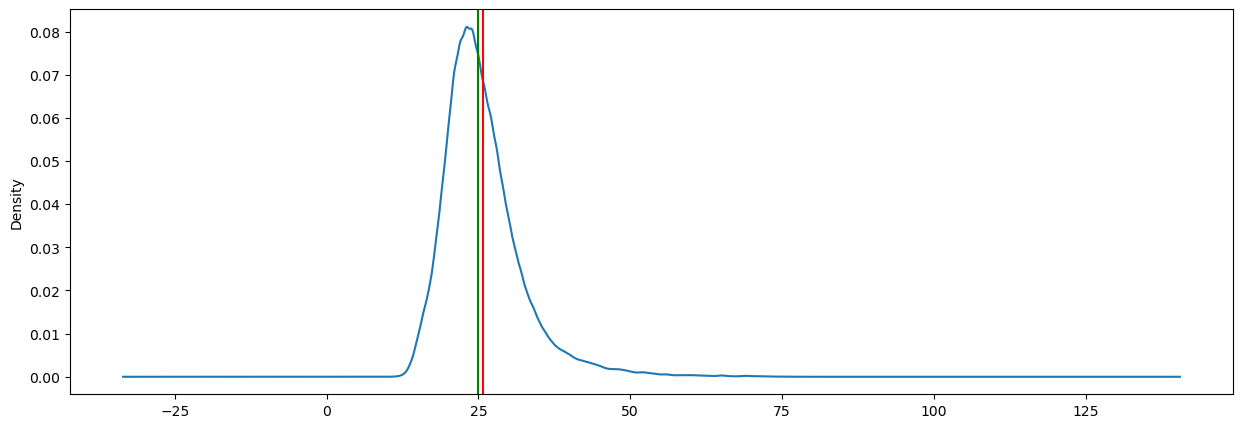

In [9]:
ax = summer_athletes['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(summer_athletes['Age'].mean(), color='red')
ax.axvline(summer_athletes['Age'].median(), color='green')

# Time 8.6s

In [10]:
summer_athletes['Age'].mean()

# Time 0.0s

25.746266697011606

In [11]:
summer_athletes['Age'].median()

# Time 0.0s

25.0

In [12]:
summer_athletes.min()

# Time 0.2s

C:\Users\Kamila Nita\AppData\Local\Temp\ipykernel_14104\1087551993.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summer_athletes.min()


Name        Gabrielle Marie "Gabby" Adcock (White-)
Sex                                               F
Age                                            10.0
Team                                    30. Februar
NOC                                             AFG
Games                                   1896 Summer
Year                                           1896
Season                                       Summer
City                                      Amsterdam
Sport                                3x3 Basketball
Event                            10m Air Pistol Men
dtype: object

In [13]:
summer_athletes.max()

# Time 0.2s

C:\Users\Kamila Nita\AppData\Local\Temp\ipykernel_14104\147607368.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summer_athletes.max()


Name                                       zzet nce
Sex                                               M
Age                                            97.0
Team                                           rn-2
NOC                                             ZIM
Games                                   2020 Summer
Year                                           2020
Season                                       Summer
City                                          Tokyo
Sport                                     Wrestling
Event     Wrestling Women's Middleweight, Freestyle
dtype: object

<AxesSubplot:ylabel='Frequency'>

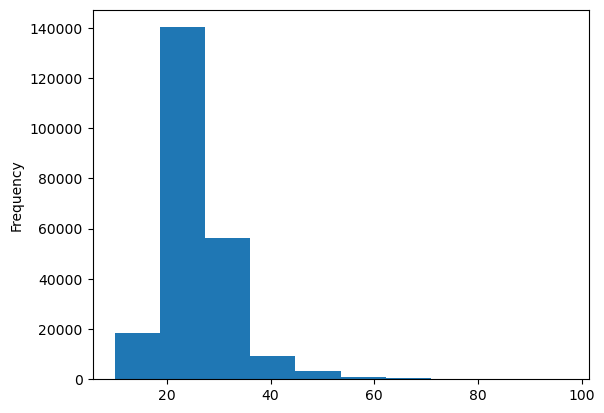

In [14]:
summer_athletes['Age'].plot(kind='hist')

# Time 0.1s

<AxesSubplot:xlabel='Year'>

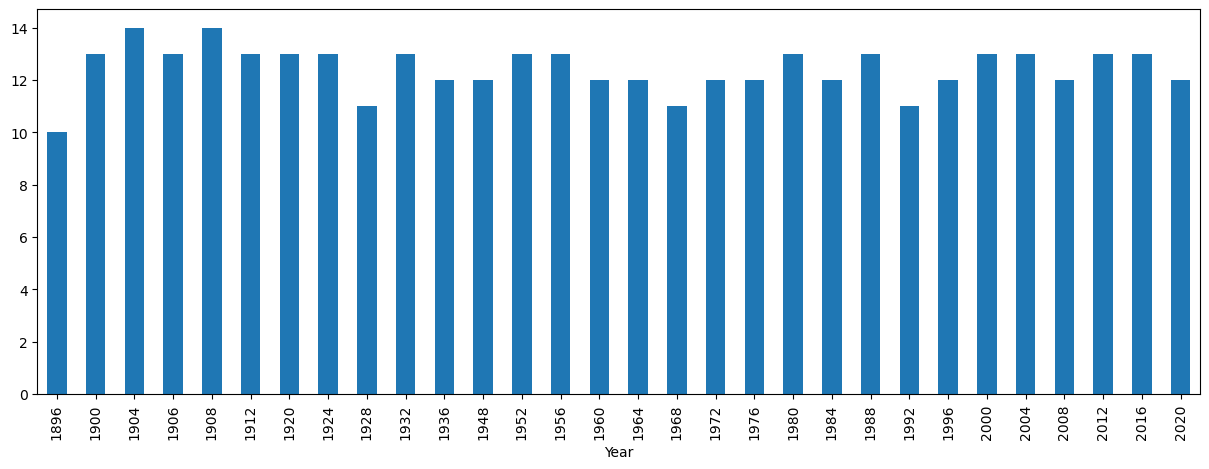

In [10]:
summer_athletes.groupby('Year')['Age'].min().plot(kind='bar', figsize=(15,5))

# Time 0.2s

<AxesSubplot:xlabel='Year'>

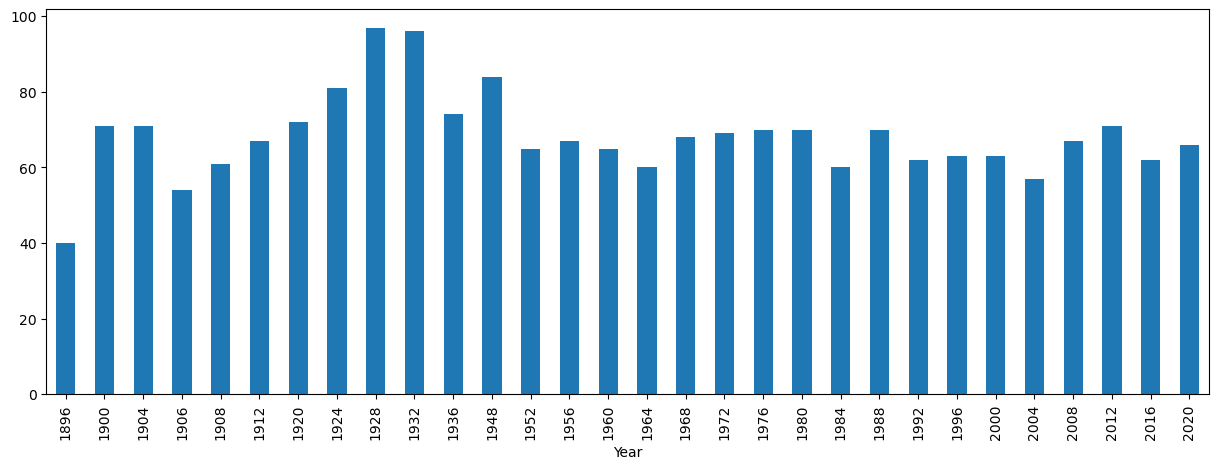

In [17]:
summer_athletes.groupby('Year')['Age'].max().plot(kind='bar', figsize=(15,5))

# Time 0.2s

In [18]:
corr = summer_athletes.corr() #Brak zgodności im bliżej jedynki tym lepiej, opisać jakoś otrzymane wyniki
corr

# Time 0.0s

,Age,Year
Age,1.000000,-0.106253
Year,-0.106253,1.000000


([<matplotlib.axis.YTick at 0x253f8f6d940>,
 [Text(0, 0, 'Age'), Text(0, 1, 'Year')])

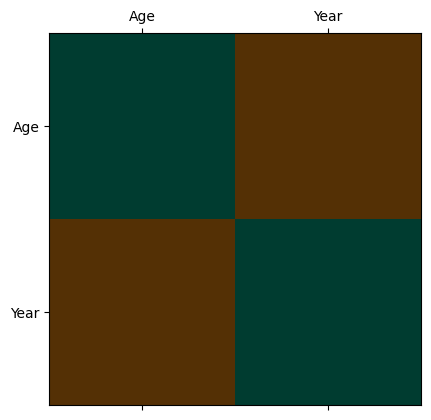

In [19]:
fig = plt.figure()
plt.matshow(corr, cmap='BrBG', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

# Time 0.1s

In [17]:
summer_athletes['Sex'].value_counts()

# Time 0.0s

M    170964
F     66709
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

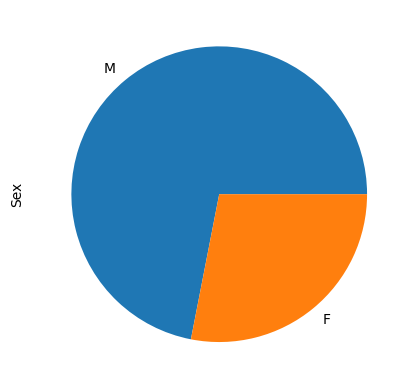

In [18]:
summer_athletes['Sex'].value_counts().plot(kind='pie')

# Time 0.1s

In [11]:
summer_athletes['Games'].value_counts()

# Time 0.0s

2020 Summer    15121
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
1920 Summer     4292
1912 Summer     4040
1908 Summer     3101
1932 Summer     2969
1900 Summer     1936
1906 Summer     1733
1904 Summer     1301
1896 Summer      380
Name: Games, dtype: int64

<AxesSubplot:>

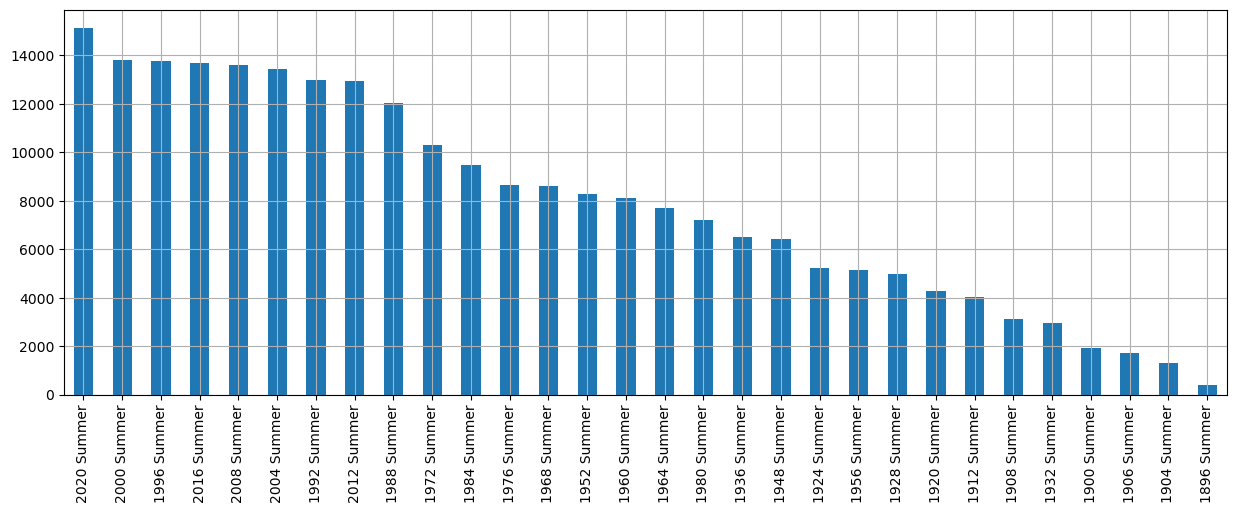

In [36]:
summer_athletes['Games'].value_counts().plot(kind='bar', figsize=(15,5), grid=True)

# Time 0.3s

In [39]:
summer_athletes['City'].value_counts()

# Time 0.0s

Tokyo             22823
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Beijing           13602
Barcelona         12977
Los Angeles       12423
Seoul             12037
Munich            10304
Montreal           8641
Mexico City        8588
Helsinki           8270
Roma               8119
Moskva             7191
Paris              7169
Berlin             6506
Amsterdam          4992
Melbourne          4829
Stockholm          4338
Antwerpen          4292
St. Louis          1301
Name: City, dtype: int64

<AxesSubplot:ylabel='City'>

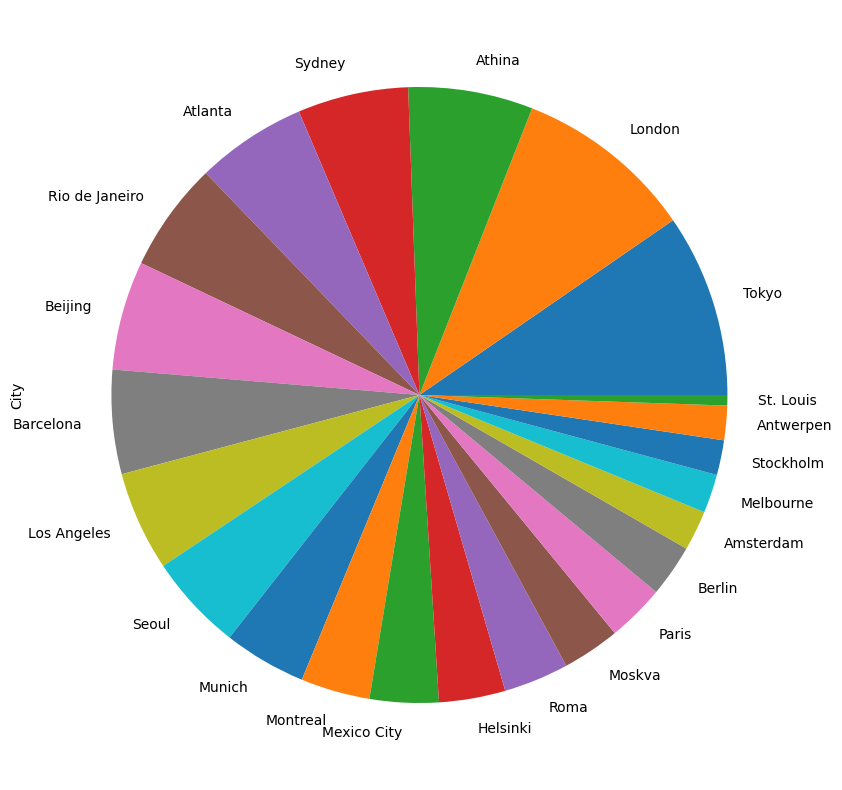

In [35]:
summer_athletes['City'].value_counts().plot(kind='pie', figsize=(10,10))

# Time 0.2s

In [7]:
athletes_by_country_IO_2020 = summer_athletes.query("Games == '2020 Summer'")

# Time 0.0s

In [13]:
athletes_by_country_IO_2020['Team'].value_counts()

# Time 0.0s

United States    856
Japan            787
Australia        638
Germany          597
China            574
                ... 
South Sudan        2
Nauru              2
Brunei             2
Mauritania         2
Bermuda            2
Name: Team, Length: 206, dtype: int64

<AxesSubplot:>

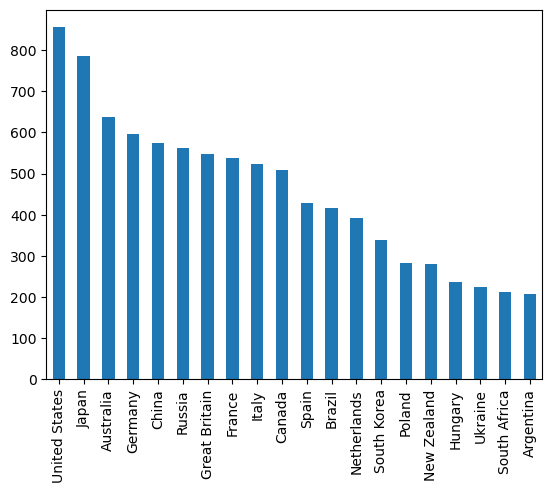

In [16]:
athletes_by_country_IO_2020['Team'].value_counts().head(20).plot(kind='bar')

# Time 0.2s

In [45]:
athletes_per_sport = summer_athletes.loc[summer_athletes['Games'] == '2020 Summer', 'Sport'].value_counts()

athletes_per_sport

# Times 0.0s

Athletics                2318
Swimming                 1634
Artistic Gymnastics      1061
Football                  608
Shooting                  577
Rowing                    526
Judo                      516
Hockey                    432
Cycling Track             426
Equestrian                420
Fencing                   419
Canoe Sprint              412
Handball                  368
Sailing                   350
Rugby Sevens              312
Tennis                    290
Wrestling                 289
Boxing                    289
Basketball                288
Volleyball                288
Water Polo                286
Table Tennis              263
Cycling Road              259
Archery                   258
Baseball/Softball         234
Weightlifting             197
Triathlon                 182
Badminton                 181
Diving                    179
Taekwondo                 130
Artistic Swimming         124
Golf                      120
Rhythmic Gymnastics        96
Beach Voll

<AxesSubplot:>

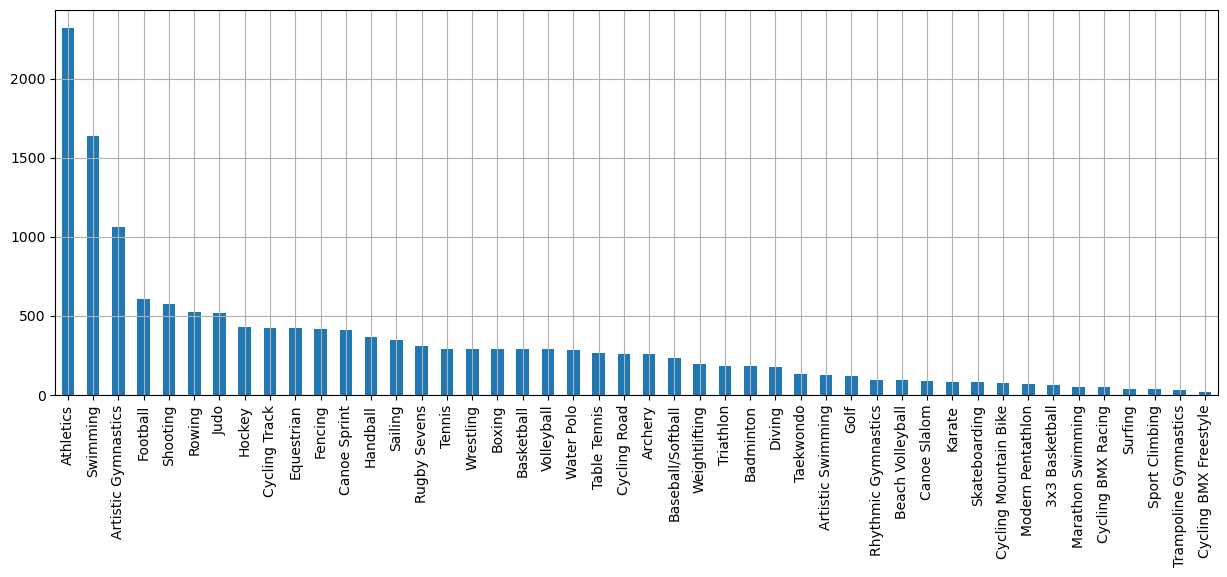

In [47]:
athletes_per_sport.plot(kind='bar', figsize=(15,5), grid=True)

In [60]:
medals_IO2020 = summer_athletes.loc[summer_athletes['Games'] == '2020 Summer', 'Medal'].value_counts()

medals_IO2020

# Time 0.0s

Bronze    867
Gold      800
Silver    782
Name: Medal, dtype: int64

In [61]:
medals_IO2020.sum()

# Time 0.0s

2449

In [23]:
summer_athletes['Sport'].unique()

# Time 0.0s

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics', 'Cycling Road', 'Artistic Gymnastics',
       'Karate', 'Baseball/Softball', 'Trampoline Gymnastics',
       'Marathon Swimming', 'Canoe Slalom', 'Surfing', 'Canoe Sprint',
       'Cycling BMX Racing', 'Equestrian', 

In [25]:
summer_athletes['Sport'].value_counts()

# Time 0.0s

Athletics        40942
Gymnastics       26707
Swimming         24829
Shooting         12025
Fencing          11154
                 ...  
Jeu De Paume        11
Alpinism             4
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 70, dtype: int64

<AxesSubplot:>

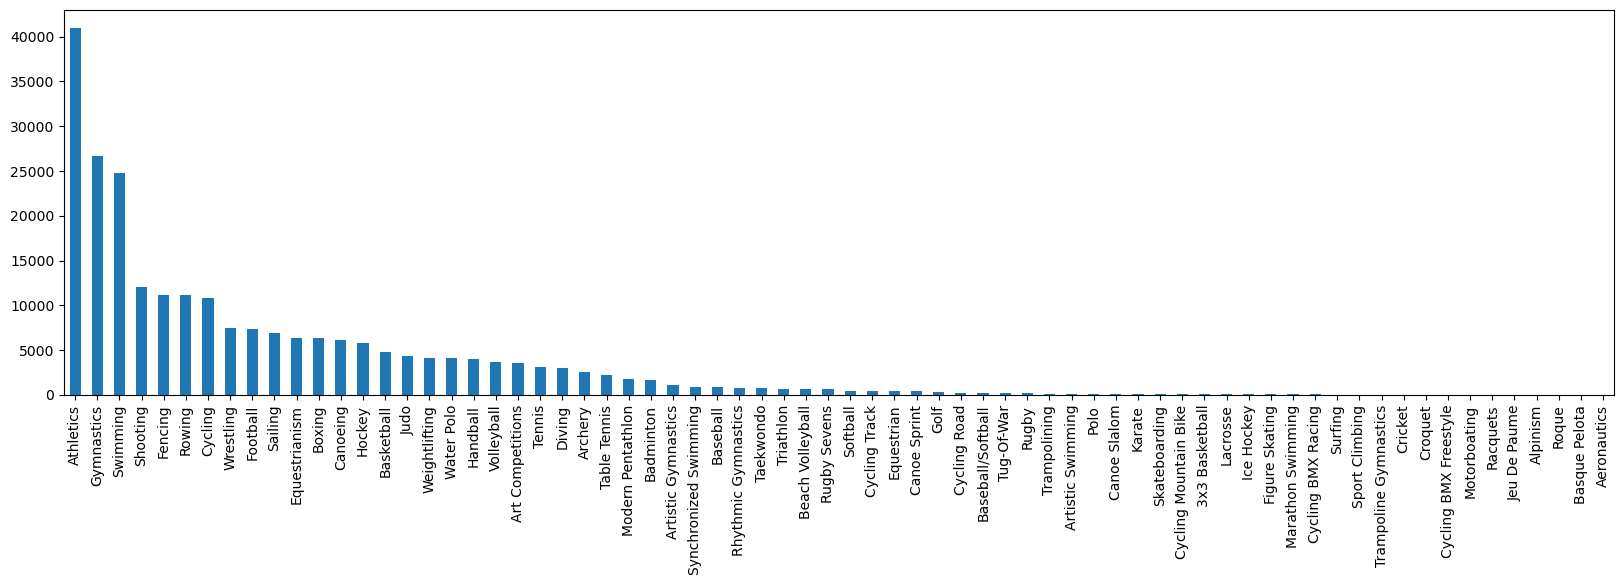

In [41]:
summer_athletes['Sport'].value_counts().plot(kind='bar', figsize=(20,5))

# Time 1.3s

In [56]:
summer_athletes['Medal'].value_counts()

# Time 0.0s

Bronze    12276
Gold      12259
Silver    12002
Name: Medal, dtype: int64

<AxesSubplot:ylabel='Medal'>

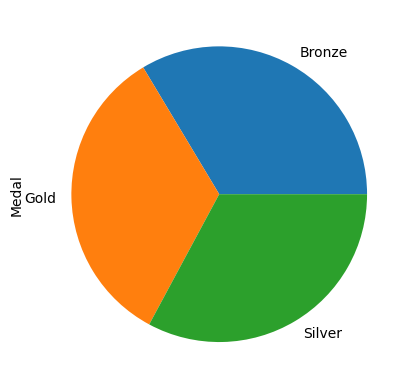

In [59]:
summer_athletes['Medal'].value_counts().plot(kind='pie')

# Time 0.1s

In [63]:
polish_athlets = summer_athletes.query("NOC == 'POL'")

polish_athlets

# Time 0.0s

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
901,Mariola Teresa Abrahamczyk (-Fronckowiak),F,21.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Women's Coxed Quadruple Sculls,NaN
1325,Kazimierz Piotr Adach,M,23.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Boxing,Boxing Men's Lightweight,Bronze
1386,Stefan Adamczak,M,31.0,Poland,POL,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Pole Vault,NaN
1388,Dariusz Adamczuk,M,22.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Silver
1389,Adam Eucharyst Adamczyk,M,21.0,Poland,POL,1972 Summer,1972,Summer,Munich,Judo,Judo Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15071,ZILLMANN Katarzyna,F,26.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Rowing,Women's Quadruple Sculls Team,Silver
15074,ZIMNY Tymoteusz,M,23.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Athletics,Men's 4 x 400m Relay,NaN
15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN
15119,ZYZANSKA Sylwia,F,24.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Archery,Women's Individual,NaN


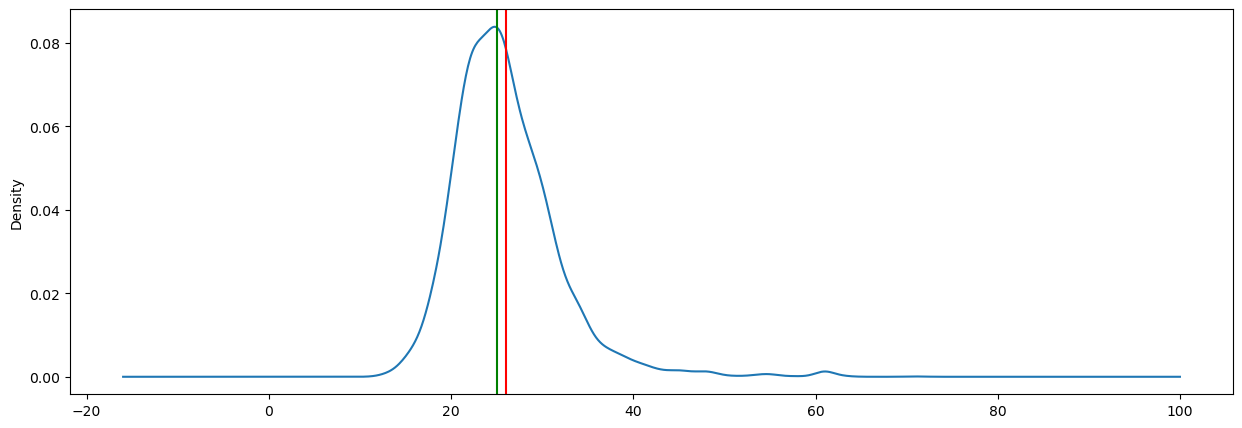

In [66]:
ax = polish_athlets['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(polish_athlets['Age'].mean(), color='red')
ax.axvline(polish_athlets['Age'].median(), color='green')

# Time 0.9s

In [67]:
polish_athlets['Sex'].value_counts()

# Time 0.0s

M    3687
F    1460
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

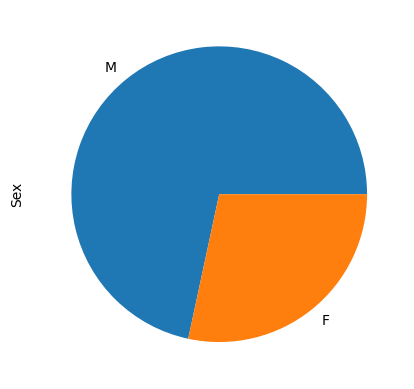

In [79]:
polish_athlets['Sex'].value_counts().plot(kind='pie')

# Time 0.1s

In [68]:
polish_IO2020 = polish_athlets['Medal'].value_counts()

polish_IO2020

# Time 0.0s

Bronze    250
Silver    199
Gold      125
Name: Medal, dtype: int64

In [83]:
polish_athlets.query("Name == 'Elbieta Rozalia Apostolska (-Kamiska)'")

# Time 0.0s

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8575,Elbieta Rozalia Apostolska (-Kamiska),F,20.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Individual All-Around,NaN
8576,Elbieta Rozalia Apostolska (-Kamiska),F,20.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Team All-Around,NaN
8577,Elbieta Rozalia Apostolska (-Kamiska),F,20.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Floor Exercise,NaN
8578,Elbieta Rozalia Apostolska (-Kamiska),F,20.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Horse Vault,NaN
8579,Elbieta Rozalia Apostolska (-Kamiska),F,20.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Uneven Bars,NaN
8580,Elbieta Rozalia Apostolska (-Kamiska),F,20.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Balance Beam,NaN
